In [2]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import json
import math
from sklearn.model_selection import train_test_split

### 1.  Read Dataset and remove NAN values

In [3]:
diamonds = pd.read_csv('diamonds.csv')

diamonds.dropna(inplace=True)
diamonds.head()


carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [4]:
test_diamond = [[0.21, 0, 0, 1, 59.8, 61, 3.89, 3.84, 2.31]]
test_price = model2.predict(test_diamond)
test_price

NameError: name 'model2' is not defined

### 2.  Mapping non-numerical values to numerical ones

**Cut Quality**
| Cut        | Mapping |
|------------|------|
| Ideal      | 0    |
| Premium    | 1    |
| Good       | 2    |
| Very Good  | 3    |
| Fair       | 4    |

**Color Grade**
| Color | Mapping |
|-------|------|
| E     | 0    |
| I     | 1    |
| J     | 2    |
| H     | 3    |
| F     | 4    |
| G     | 5    |
| D     | 6    |

**Clarity Grade**
| Clarity | Mapping |
|---------|------|
| SI2     | 0    |
| SI1     | 1    |
| VS1     | 2    |
| VS2     | 3    |
| VVS2    | 4    |
| VVS1    | 5    |
| I1      | 6    |
| IF      | 7    |

In [5]:
cut_mapping = {cut: i for i, cut in enumerate(diamonds['cut'].unique())}
color_mapping = {color: i for i, color in enumerate(diamonds['color'].unique())}
clarity_mapping = {clarity: i for i, clarity in enumerate(diamonds['clarity'].unique())}

### 3.  Replace the non-numerical columns with their numerical mappings

In [6]:
diamonds_numerical = diamonds.copy()
diamonds_numerical['cut'] = diamonds['cut'].map(cut_mapping)
diamonds_numerical['color'] = diamonds['color'].map(color_mapping)
diamonds_numerical['clarity'] = diamonds['clarity'].map(clarity_mapping)

In [7]:
# store rows where x or y or z is 0
zero_rows = diamonds[(diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)]
zero_rows

carat        cut color clarity  depth  table  price     x     y    z
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26123   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.00  0.00  0.0
27112   2.20    Premium     H     SI1   61.2   59.0  17265  8.42  8.37  0.0
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.00  0.00  0.0
27503   2.02    Premium     H     VS2   62.7   53.0  18207  8.02  7.95  0.0
27739   2.80       Good     G     SI2   63.8   58.0  18788  8.90  8.85  0.0
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
51506   1.12    Premium     G      I1   60.4   59.0   2383  6.71  6.67  0.0

In [8]:
# drop rows with outliers (x = 0, y = 0 or z = 0)
mask = (diamonds_numerical['x'] == 0) | (diamonds_numerical['y'] == 0) | (diamonds_numerical['z'] == 0)
diamonds_numerical = diamonds_numerical.drop(diamonds_numerical[mask].index)
# write diamonds_numerical to csv
diamonds_numerical.to_csv('diamonds_numerical.csv', index=True)

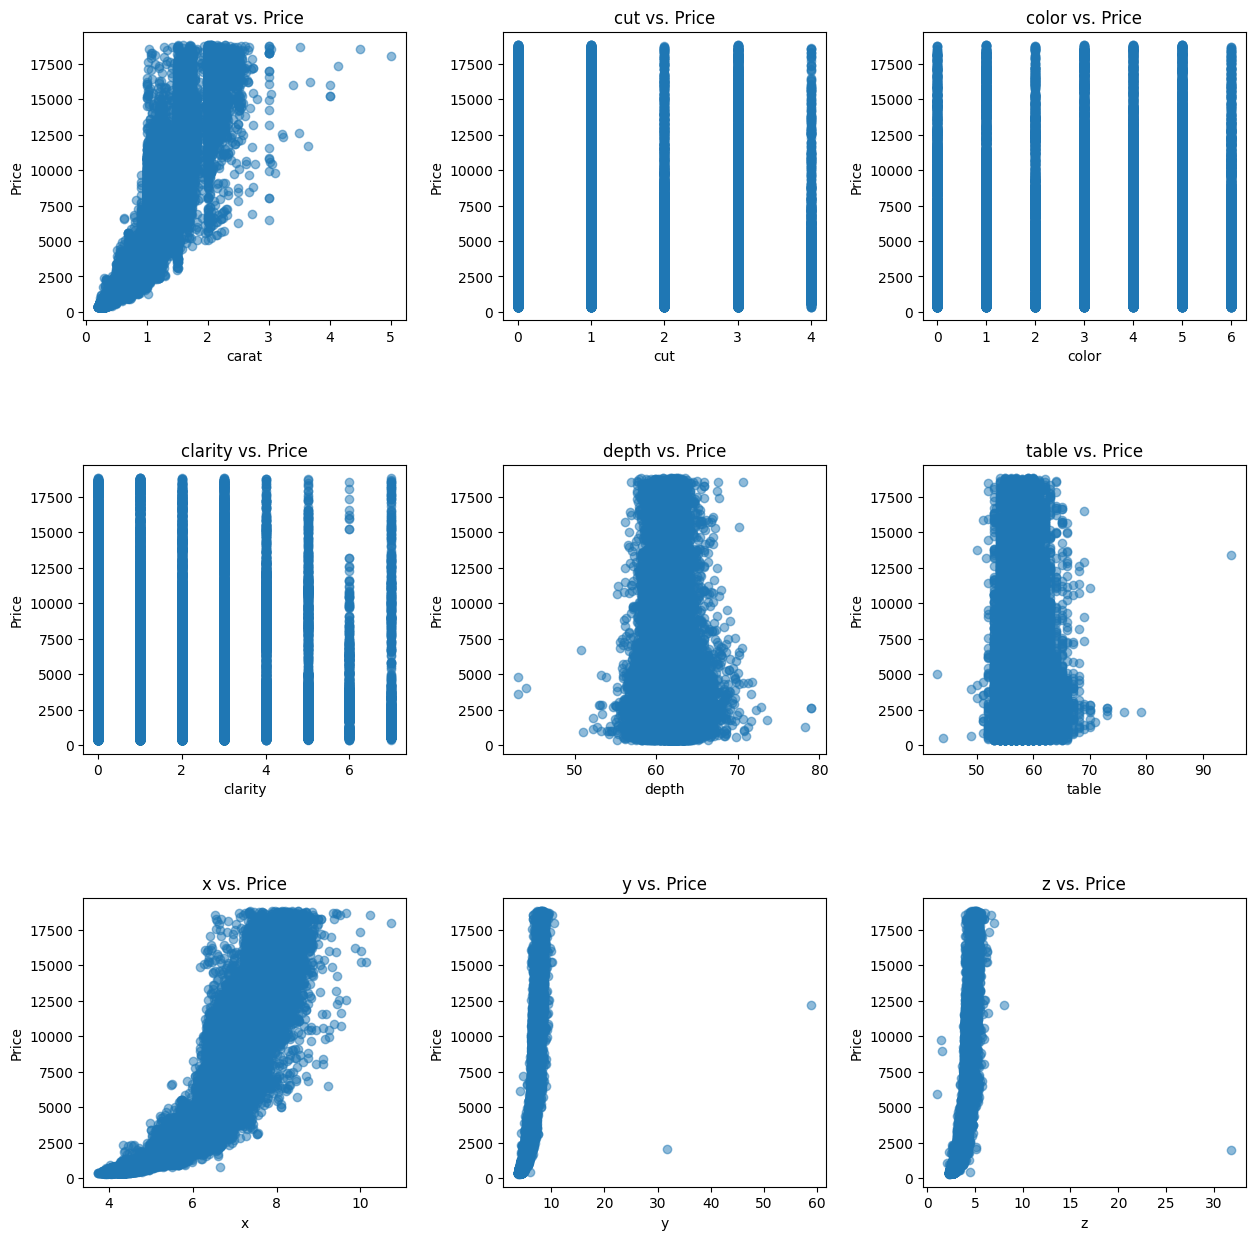

In [9]:
# Creating separate plots for each feature against price
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# List of all the features except price
features = diamonds_numerical.columns.drop('price')

# Plot each feature against price
for ax, feature in zip(axes.flatten(), features):
    ax.scatter(diamonds_numerical[feature], diamonds_numerical['price'], alpha=0.5)
    ax.set_title(f'{feature} vs. Price')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')

plt.show()


In [19]:
X = diamonds_numerical.drop('price', axis = 1)
X = X.drop('cut', axis = 1)
y = diamonds_numerical['price']
X

carat  color  clarity  depth  table     x     y     z
0       0.23      0        0   61.5   55.0  3.95  3.98  2.43
1       0.21      0        1   59.8   61.0  3.89  3.84  2.31
2       0.23      0        2   56.9   65.0  4.05  4.07  2.31
3       0.29      1        3   62.4   58.0  4.20  4.23  2.63
4       0.31      2        0   63.3   58.0  4.34  4.35  2.75
...      ...    ...      ...    ...    ...   ...   ...   ...
53935   0.72      6        1   60.8   57.0  5.75  5.76  3.50
53936   0.72      6        1   63.1   55.0  5.69  5.75  3.61
53937   0.70      6        1   62.8   60.0  5.66  5.68  3.56
53938   0.86      3        0   61.0   58.0  6.15  6.12  3.74
53939   0.75      6        0   62.2   55.0  5.83  5.87  3.64

[53920 rows x 8 columns]

In [20]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53920, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Train the models
model.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1920307.5427267884
R^2 Score: 0.8802199708126777


In [25]:
from xgboost import XGBRegressor
model2 = XGBRegressor(n_estimators=100,random_state=42)
model2.fit(X_train, y_train)

KeyboardInterrupt: 

In [36]:
y_pred2 = model2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)
print("Mean Squared Error:", mse2)
print("R^2 Score:", r22)

Mean Squared Error: 303969.39467222965
R^2 Score: 0.9810397750590555


In [37]:
from sklearn.neural_network import MLPRegressor
model4 = MLPRegressor(random_state=42, max_iter=500)
# model4.fit(X_train, y_train)

/home/fadi/Desktop/dev/sas2/clone2/ws-23-sas-02/sas2/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=500, random_state=42)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred4 = model4.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred2)
mse4 = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred)
r22 = r2_score(y_test, y_pred2)
r24 = r2_score(y_test, y_pred4)
print("Mean Squared Error:", mse)
print("MSE 2 ", mse2)
print("MSE 4 ", mse4)
print("R^2 Score:", r2)
print("R^2 Score:", r22)
print("R^2 Score:", r24)

Mean Squared Error: 1896296.209209171
MSE 2  303969.39467222965
MSE 4  1366191.3819000595
R^2 Score: 0.881717688321761
R^2 Score: 0.9810397750590555
R^2 Score: 0.9147832105230972


In [28]:
test_diamond = [[
  0.86,
    3,
    0,
    61,
    58,
    6.15,
    6.12,
    3.74
]]
test_price = model.predict(test_diamond)
test_price


/home/fadi/Desktop/dev/sas2/clone2/ws-23-sas-02/sas2/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3672.24864574])

In [29]:
# random forest
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred3 = model3.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred3)
r23 = r2_score(y_test, y_pred3)
print("Mean Squared Error:", mse3)
print("R^2 Score:", r23)

NameError: name 'y_pred3' is not defined